In [1]:
import xmltodict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def xrdml2csv(xrdml_file, csv_file):
    with open(xrdml_file) as f:
        xrdml = xmltodict.parse(f.read())
    axis_dict = xrdml['xrdMeasurements']['xrdMeasurement']['scan']['dataPoints']['positions'][0]
    assert axis_dict['@axis'] == '2Theta', 'Only 2Theta axis is supported'
    startPos = float(axis_dict['startPosition'])
    endPos = float(axis_dict['endPosition'])

    data = xrdml['xrdMeasurements']['xrdMeasurement']['scan']['dataPoints']['intensities']['#text']
    intensities = np.array(data.split(), dtype=float)
    two_theta = np.linspace(startPos, endPos, len(intensities))

    df = pd.DataFrame({'2Theta': two_theta, 'Intensity': intensities})
    df.to_csv(csv_file, index=False)
    return df

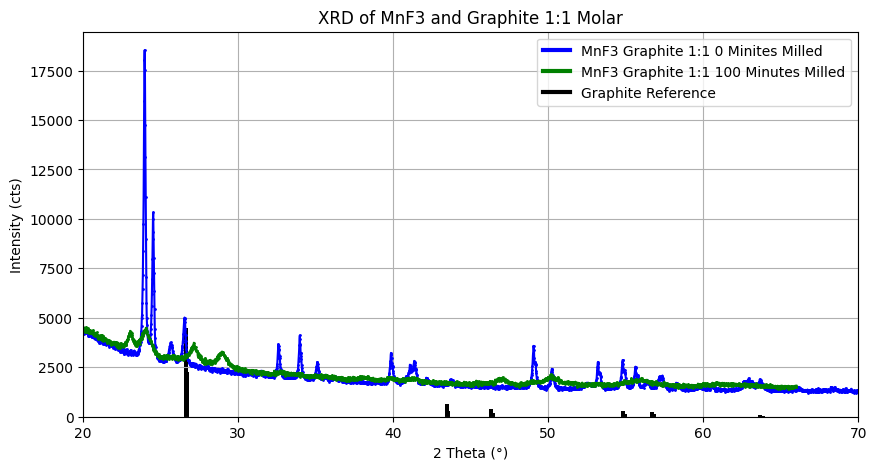

In [11]:
# List of CSV files
from matplotlib.lines import Line2D

path1='/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/MnF3/240918-MnF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv'
path2 = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/MnF3/240920-MnF3_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.csv'
graphite = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/Graphite_reference_final.csv'

csv_files = [path1, path2,graphite]
colors = ['b', 'g', 'black']  # Colors for each CSV
legend_labels = ['MnF3 Graphite 1:1 0 Minites Milled', 'MnF3 Graphite 1:1 100 Minutes Milled', "Graphite Reference"]

plt.figure(figsize=(10, 5))

# Loop through each CSV and plot
for i, csv_file in enumerate(csv_files):
    data = pd.read_csv(csv_file)
    
    x_column = '2Theta'  # Change to your x-axis column name
    y_column = 'Intensity'  # Change to your y-axis column name
    
    if csv_file == graphite:
        plt.bar(data['2Theta'], 4.5*data['Intensity'], width = 0.25,color=colors[i % len(colors)], label = legendlabels[i])
    else:
    
        plt.plot(data['2Theta'], data['Intensity'], marker='o', markersize=1, linestyle='-', color=colors[i % len(colors)], label = legendlabels[i])

custom_handles = [Line2D([0], [0], color=color, lw=3) for color in colors]
legend_labels_for_plot = [label for label in legend_labels if label is not None]

plt.xlabel('2 Theta (°)')
plt.ylabel('Intensity (cts)')
plt.title('XRD of MnF3 and Graphite 1:1 Molar')
plt.xlim(20,70)
plt.legend(handles=custom_handles, labels=legend_labels_for_plot)
plt.grid()
plt.show()
